Modularize functions for scaling and labeling so easier to test different configurations

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.preprocessing as preprocess
from collections import Counter, OrderedDict
import pprint
from scipy.stats import chisquare
from sklearn.decomposition import PCA
import seaborn as sns

pp = pprint.PrettyPrinter(indent=4)

In [2]:
unique_df = pd.read_csv("TopCharts_merged.csv", index_col = 0).drop(columns = ["Instrumentalness", "Time Signature", "Key", "Mode"])

In [3]:
unique_df.head()

,Artist,Title,Id,Tempo,Valence,Danceability,Energy,Acousticness,Days,Artist Id,Artist Followers,Artist Popularity,Artist Genres
0,Post Malone,rockstar,0e7ipj03S05BNilyu5bRzt,159.801,0.129,0.585,0.520,0.1240,116,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
1,Post Malone,I Fall Apart,75ZvA4QfFiZvzhj2xkaWAh,143.950,0.291,0.556,0.538,0.0689,756,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
2,Post Malone,Candy Paint,32lItqlMi4LBhb4k0BaSaC,180.064,0.381,0.664,0.667,0.6400,496,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
3,Post Malone,Congratulations,3a1lNhkSLSkpJE4MSHpDu9,123.146,0.492,0.630,0.804,0.2150,702,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
4,Post Malone,Go Flex,5yuShbu70mtHXY0yLzCQLQ,81.967,0.127,0.665,0.498,0.2280,178,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap


In [4]:
cnt_df = unique_df.iloc[:,3:8]

In [5]:
cnt_df.head()

,Tempo,Valence,Danceability,Energy,Acousticness
0,159.801,0.129,0.585,0.520,0.1240
1,143.950,0.291,0.556,0.538,0.0689
2,180.064,0.381,0.664,0.667,0.6400
3,123.146,0.492,0.630,0.804,0.2150
4,81.967,0.127,0.665,0.498,0.2280


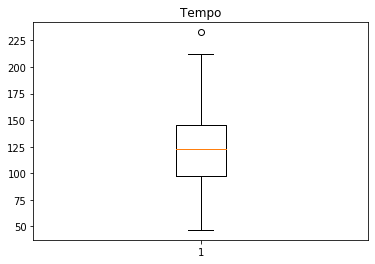

count    3398.000000
mean      122.540898
std        30.341369
min        46.718000
25%        97.013250
50%       122.748500
75%       145.030250
max       232.690000
Name: Tempo, dtype: float64


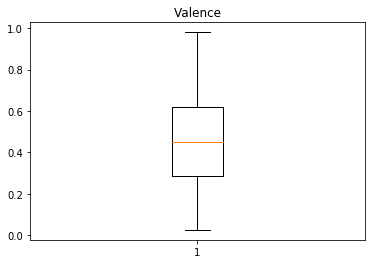

count    3398.000000
mean        0.457230
std         0.217354
min         0.026200
25%         0.286250
50%         0.451000
75%         0.618000
max         0.980000
Name: Valence, dtype: float64


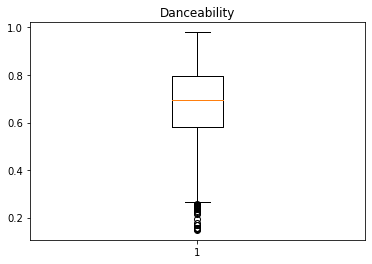

count    3398.000000
mean        0.680241
std         0.155014
min         0.148000
25%         0.581000
50%         0.696000
75%         0.795000
max         0.980000
Name: Danceability, dtype: float64


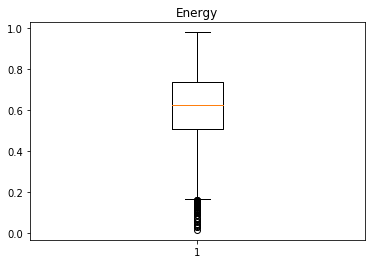

count    3398.000000
mean        0.610853
std         0.173070
min         0.013700
25%         0.506000
50%         0.625000
75%         0.736000
max         0.978000
Name: Energy, dtype: float64


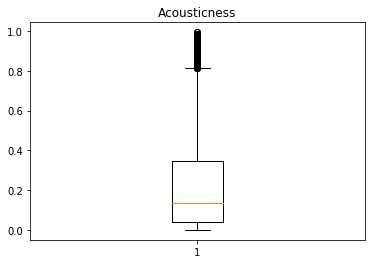

count    3398.000000
mean        0.234983
std         0.255857
min         0.000002
25%         0.038825
50%         0.134000
75%         0.348750
max         0.994000
Name: Acousticness, dtype: float64


In [6]:
for c in cnt_df.columns:
    plt.boxplot(cnt_df[c])
    plt.title(c)
    plt.show()
    print(cnt_df[c].describe())

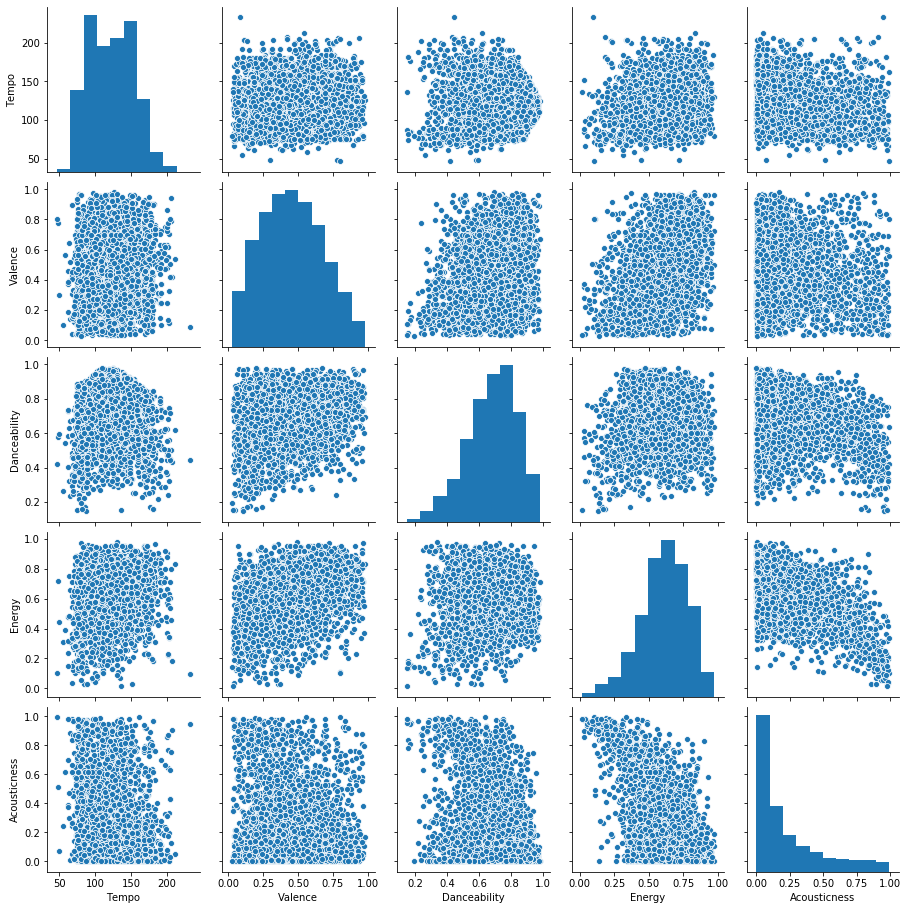

In [7]:
sns.pairplot(cnt_df.iloc[:,:])

In [8]:
cnt_df.corr()

,Tempo,Valence,Danceability,Energy,Acousticness
Tempo,1.000000,0.018256,0.033734,0.120464,-0.153863
Valence,0.018256,1.000000,0.225409,0.348100,-0.092728
Danceability,0.033734,0.225409,1.000000,0.070050,-0.310829
Energy,0.120464,0.348100,0.070050,1.000000,-0.541778
Acousticness,-0.153863,-0.092728,-0.310829,-0.541778,1.000000


## Cluster

In [6]:
cluster_cols = cnt_df.columns

In [7]:
def scaleData(scaler, df, col_list = cluster_cols):
    
    """
    normalizes continuous values in dataframe
    
    inputs:  scaler:    one of the scaler functions from sklearn.preprocessing
             song_df:   dataframe of songs (with titles) 
             firstCol:  index of first column of continuous values to be rescaled in song_df 
    
    returns: dataframe of songs (with titles) with rescaled continuous values
    """
    
    scaled_df = df.copy()
        
    cluster_values = df.loc[:,col_list]
    mms = scaler()
    scaled_values = mms.fit_transform(cluster_values)
    
    for i in range(scaled_values.shape[1]):
        scaled_df[col_list[i]] = scaled_values[:,i]

    return scaled_df

In [8]:
scaled_df = scaleData(preprocess.MinMaxScaler, unique_df)

In [9]:
scaled_df.head()

,Artist,Title,Id,Tempo,Valence,Danceability,Energy,Acousticness,Days,Artist Id,Artist Followers,Artist Popularity,Artist Genres
0,Post Malone,rockstar,0e7ipj03S05BNilyu5bRzt,0.608065,0.107779,0.525240,0.525044,0.124747,116,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
1,Post Malone,I Fall Apart,75ZvA4QfFiZvzhj2xkaWAh,0.522831,0.277626,0.490385,0.543710,0.069314,756,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
2,Post Malone,Candy Paint,32lItqlMi4LBhb4k0BaSaC,0.717022,0.371986,0.620192,0.677486,0.643863,496,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
3,Post Malone,Congratulations,3a1lNhkSLSkpJE4MSHpDu9,0.410965,0.488362,0.579327,0.819558,0.216296,702,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
4,Post Malone,Go Flex,5yuShbu70mtHXY0yLzCQLQ,0.189539,0.105683,0.621394,0.502230,0.229375,178,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap


In [10]:
def plotKMeans(scaled_df, minCluster, maxCluster, col_list):
    """
    applies k-means clustering to dataframe and plots inertia and change in inertia for corresponding to number of clusters
    
    inputs:   df:          dataframe with only continuous values
              minCluster:  smallest number of desired clusters
              maxClusters: largest number of desired clusters
              col_list:    columns to cluster on
    
    returns:  list of intertias corresponding to number of clusters ranging from minCluster to maxCluster
    
    """

    df = scaled_df.loc[:,col_list]
    
    
    inertias = []
    for i in range(minCluster, maxCluster+1):
        kmeans = KMeans(n_clusters = i).fit(df)
        inertias.append(kmeans.inertia_)    
    
    plt.plot(range(1,len(inertias)+1), inertias, "bx-")
    plt.xlabel('k')
    plt.ylabel("Inertia")
    plt.xticks(range(1,len(inertias)+1))
    plt.show()
    
    
    diffs = np.array(inertias[1:]) - np.array(inertias[:len(inertias)-1])
    plt.plot(range(1,len(inertias)+1), [-inertias[0]] + list(diffs),"bx-")
    plt.ylabel("Change in Inertia")
    plt.xticks(range(1,len(inertias)+1))

    plt.show()
    
    return inertias
    

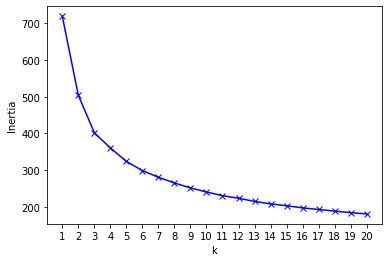

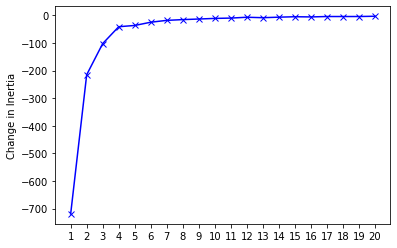

In [11]:
inertias = plotKMeans(scaled_df, 1, 20, cluster_cols)

In [12]:
def sort_df(df, k):
    df = df.sort_values(by = "Label").reset_index(drop = True)

    for i in range(k):
        sub = df.loc[df.Label == i]
        first = sub.index[0]
        last = sub.index[-1]+1
        df.iloc[first:last, :] = sub.sort_values(by = "Days", ascending = False).values
    
    return df.reset_index(drop = True)

In [13]:
def fitKMeans(scaled_df, k, col_list):
    """
    applies k-means clustering with k clusters to dataframe
    
    inputs:   song_df:      dataframe of songs (with titles)
              clusters:  number of desired clusters
              col_list: list of column indexes to cluster on
            
    returns:  dataframe of songs with cluster number
              dict of dataframes {cluster number: subset of song_df with songs belonging to cluster}
              dict of Counters   {cluster number: Counter(artist, number of times artist appears in cluster)}
    """
    
    kmeans_opt = KMeans(n_clusters = k).fit(scaled_df.loc[:,col_list])
    labels_df = scaled_df.copy()
    labels_df["Label"] = kmeans_opt.labels_
    
    return sort_df(labels_df, k)

In [14]:
k = 5

In [15]:
cluster_df = fitKMeans(scaled_df, k, cluster_cols)

In [16]:
cluster_df.head()

,Artist,Title,Id,Tempo,Valence,Danceability,Energy,Acousticness,Days,Artist Id,Artist Followers,Artist Popularity,Artist Genres,Label
0,Post Malone,I Fall Apart,75ZvA4QfFiZvzhj2xkaWAh,0.522831,0.277626,0.490385,0.543710,0.069314,756,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap,0
1,Post Malone,rockstar (feat. 21 Savage),0e7ipj03S05BNilyu5bRzt,0.608065,0.107779,0.525240,0.525044,0.124747,641,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap,0
2,Juice WRLD,Lucid Dreams,285pBltuF7vW8TeWk8hdRR,0.199949,0.201090,0.436298,0.572747,0.351106,632,4MCBfE4596Uoi2O4DtmEMz,8176555.0,97.0,rap,0
3,Dan + Shay,Tequila,42fw0rxRO2xbesF6mJfd4Y,0.211311,0.490459,0.409856,0.588302,0.031387,629,7z5WFjZAIYejWy0NI5lv4T,1482470.0,85.0,"pop,country",0
4,5 Seconds of Summer,Youngblood,2iUXsYOEPhVqEBwsqP70rE,0.395522,0.131893,0.538462,0.871409,0.017000,585,5Rl15oVamLq7FbSb0NNBNy,5804496.0,88.0,pop,0


### Process genres

In [37]:
def getGenres(df, i, which = "props"):
    total_genres_cnt = {}
    if i == -1: #get all
        genre_list = list(df["Artist Genres"])
        
    else:
        genre_list = list(df.loc[df.Label == i, "Artist Genres"])
    n = len(genre_list)
    
    for x in genre_list:
        genres = x.split(",")
        for g in genres:
            if g not in total_genres_cnt:
                total_genres_cnt[g] = 1
            else:
                total_genres_cnt[g] += 1  
    if which == "counts":
        return total_genres_cnt
    elif which == "props":
        total_genres_prop = {k:total_genres_cnt[k]/n for k in total_genres_cnt.keys()}
        return total_genres_prop
    else:
        return total_genres_cnt,total_genres_prop


In [53]:
def getDiffs(df, k, plot = True):
    all_genres = OrderedDict(sorted(getGenres(df, -1, "props").items()))    
    all_keys = all_genres.keys()
    t = len(all_keys)
    diffs = dict()
    
    for i in range(k):
        d = getGenres(df, i, "props")
        missing = all_keys - d.keys()
        for i in missing:
            d[i] = 0
        diffs[i] = OrderedDict(sorted({k:d[k] - all_genres[k] for k in all_keys}.items())) 
        
    if plot:
        plt.barh(range(0,t), all_genres.values())
        plt.yticks(range(0, t), all_genres.keys())
        plt.title("Proportion of All Artists in Dataset with Genre")
        plt.show()
        
        for cluster in diffs.keys():
            g = diffs[cluster]
            plt.barh(range(0,t), g.values())
            plt.yticks(range(0,t), g.keys())
            plt.title(f"Diffs in Genre Proportions in Cluster {cluster} and Total")
            plt.show()
            
    return all_genres, diffs

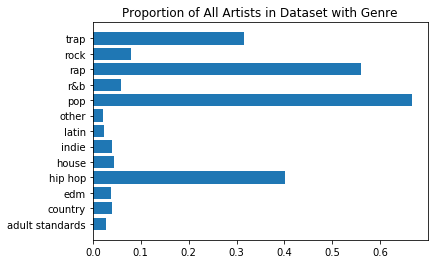

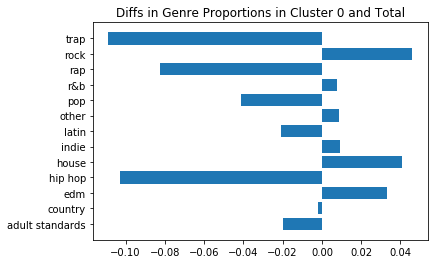

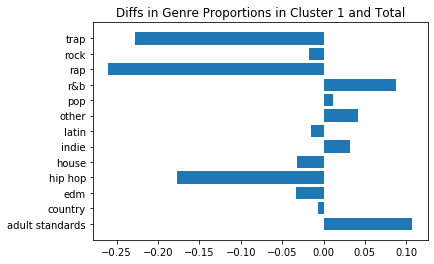

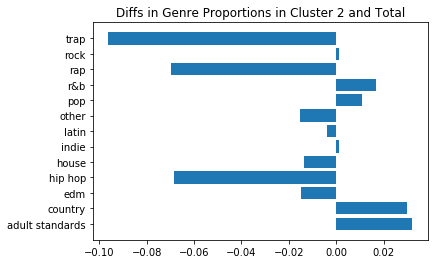

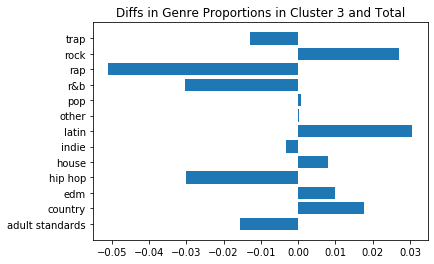

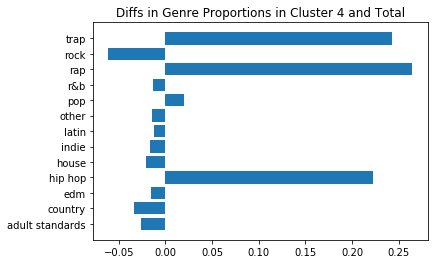

In [55]:
dat = getDiffs(cluster_df, k)